In [27]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

This is a markdown

In [28]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/atul/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

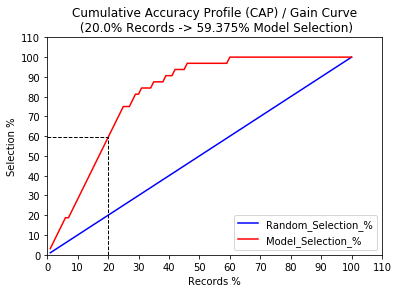

In [22]:
# Create CAP dataset
Y_pred_proba = classifier.predict_proba(X_test)
Y_cap = np.c_[y_test,Y_pred_proba[:, 1:]]
df = pd.DataFrame(data=Y_cap)
df = df.sort_values([1], ascending=False).reset_index(drop = True)
df.to_csv('courbeCAP.csv',sep=';')
     
# Append relevant columns to df to construct CAP figure
records = len(df.index)           # total records
n_acted = df[0].sum()             # total action
df['Records_%'] = pd.Series((np.linspace(1,records,records)/records)*100, index = df.index)
df['Random_Selection_%'] = df['Records_%']
df['Model_Selection_%'] = pd.Series(np.ones(records), index = df.index)
for i in range(1, records):
    df['Model_Selection_%'][i] = df[0][i] + df['Model_Selection_%'][i-1]
df['Model_Selection_%']=(df['Model_Selection_%']/n_acted)*100
    #==============================================================================
    # # Alternatively
    # records = len(df.index)           # total records
    # n_acted = df[0].sum()             # total action
    # p_acted = (n_acted/records)*100   # % of total action
    # df['Records_%'] = pd.Series((np.linspace(1,records,records)/records)*100, index = df.index)
    # df['Random_Selection_%'] = pd.Series(np.linspace(1,records,records)*p_acted/n_acted, index = df.index)
    # df['Model_Selection_%'] = pd.Series(np.zeros(records), index=df.index)
    # df['Model_Selection_%'][0] = df[0][0] #initialize first row as 1
    # for i in range(1,records):
    #     df['Model_Selection_%'][i]=df[0][i]+df['Model_Selection_%'][i-1]
    # df['Model_Selection_%']=(df['Model_Selection_%']/n_acted)*100
    #==============================================================================
df.head(10)
     
    # Obtain % Model Selection corresponding to chosen % of Total Records
percent = 20.0
     
    # Obtain % Model Selection value (interpolate if necessary)
val_y1 = df[df['Records_%']<=percent].iloc[-1]['Model_Selection_%']
val_y2 = df[df['Records_%']>=percent].iloc[0]['Model_Selection_%']
if val_y1 == val_y2:
    val = val_y1*1.0
else:
    val_x1 = df[df['Records_%']<=percent].iloc[-1]['Records_%']
    val_x2 = df[df['Records_%']>=percent].iloc[0]['Records_%']
    val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1) 
    # Visualising the Cumulative Accuracy Profile (CAP / Gain Curve)
fig, ax = plt.subplots(nrows = 1, ncols = 1)  # create figure & 1 axis
ax.plot(df['Records_%'], df['Random_Selection_%'], color = 'blue')
ax.plot(df['Records_%'], df['Model_Selection_%'], color = 'red')
# Add dotted lines to chosen % Records
ax.plot([percent, percent], [0.0, val], color='k', linestyle='--', linewidth=1)
ax.plot([0, percent], [val, val], color='k', linestyle='--', linewidth=1)
plt.title('Cumulative Accuracy Profile (CAP) / Gain Curve'+
          '\n ({a}% Records -> {b}% Model Selection)'.format(a = percent, b = val))
plt.xlabel('Records %')
plt.ylabel('Selection %')
plt.xlim(0.0, 110.0)
plt.xticks(np.linspace(0.0, 110, 12))
plt.ylim(0.0, 110.0)
plt.yticks(np.linspace(0.0 ,110 , 12))
plt.legend()
plt.show()
fig.savefig('CAP-logit.png', bbox_inches = 'tight')
plt.close(fig)

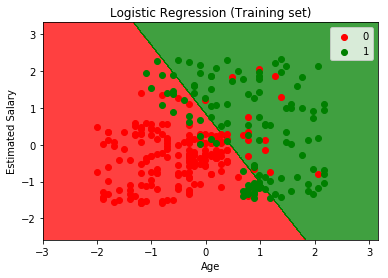

In [23]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

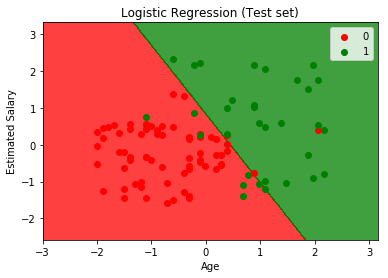

In [24]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [25]:
cm

array([[65,  3],
       [ 8, 24]])